In [1]:
# neccessary imports
import pandas as pd
import numpy as np

In [2]:
# reading the data
data=pd.read_csv('insuranceFraud.csv')

In [3]:
# Having a look at the data
data.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,10/17/2014,OH,250/500,1000,1406.91,0,466132,...,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y
1,228,42,342868,6/27/2006,IN,250/500,2000,1197.22,5000000,468176,...,0,?,5070,780,780,3510,Mercedes,E400,2007,Y
2,134,29,687698,9/6/2000,OH,100/300,2000,1413.14,5000000,430632,...,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
3,256,41,227811,5/25/1990,IL,250/500,2000,1415.74,6000000,608117,...,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
4,228,44,367455,6/6/2014,IL,500/1000,1000,1583.91,6000000,610706,...,1,NO,6500,1300,650,4550,Accura,RSX,2009,N


In [4]:
#data.info()
data.describe()

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000
mean,203.954000,38.948000,546238.648000,1136.000000,1256.406150,1.101000e+06,501214.488000,25126.100000,-26793.700000,11.644000,1.83900,0.992000,1.487000,52761.94000,7433.420000,7399.570000,37928.950000,2005.103000
std,115.113174,9.140287,257063.005276,611.864673,244.167395,2.297407e+06,71701.610941,27872.187708,28104.096686,6.951373,1.01888,0.820127,1.111335,26401.53319,4880.951853,4824.726179,18886.252893,6.015861
min,0.000000,19.000000,100804.000000,500.000000,433.330000,-1.000000e+06,430104.000000,0.000000,-111100.000000,0.000000,1.00000,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,1995.000000
25%,115.750000,32.000000,335980.250000,500.000000,1089.607500,0.000000e+00,448404.500000,0.000000,-51500.000000,6.000000,1.00000,0.000000,1.000000,41812.50000,4295.000000,4445.000000,30292.500000,2000.000000
50%,199.500000,38.000000,533135.000000,1000.000000,1257.200000,0.000000e+00,466445.500000,0.000000,-23250.000000,12.000000,1.00000,1.000000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000,2005.000000
75%,276.250000,44.000000,759099.750000,2000.000000,1415.695000,0.000000e+00,603251.000000,51025.000000,0.000000,17.000000,3.00000,2.000000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000,2010.000000
max,479.000000,64.000000,999435.000000,2000.000000,2047.590000,1.000000e+07,620962.000000,100500.000000,0.000000,23.000000,4.00000,2.000000,3.000000,114920.00000,21450.000000,23670.000000,79560.000000,2015.000000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 39 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

In [6]:
# In this dataset missing values have been denoted by '?'
# we are replacing ? with NaN for them to be imputed down the line.
data=data.replace('?',np.nan)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 39 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

In [8]:
data

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,10/17/2014,OH,250/500,1000,1406.91,0,466132,...,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y
1,228,42,342868,6/27/2006,IN,250/500,2000,1197.22,5000000,468176,...,0,NaN,5070,780,780,3510,Mercedes,E400,2007,Y
2,134,29,687698,9/6/2000,OH,100/300,2000,1413.14,5000000,430632,...,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
3,256,41,227811,5/25/1990,IL,250/500,2000,1415.74,6000000,608117,...,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
4,228,44,367455,6/6/2014,IL,500/1000,1000,1583.91,6000000,610706,...,1,NO,6500,1300,650,4550,Accura,RSX,2009,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,7/16/1991,OH,500/1000,1000,1310.80,0,431289,...,1,NaN,87200,17440,8720,61040,Honda,Accord,2006,N
996,285,41,186934,1/5/2014,IL,100/300,1000,1436.79,0,608177,...,3,NaN,108480,18080,18080,72320,Volkswagen,Passat,2015,N
997,130,34,918516,2/17/2003,OH,250/500,500,1383.49,3000000,442797,...,3,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N
998,458,62,533940,11/18/2011,IL,500/1000,2000,1356.92,5000000,441714,...,1,YES,46980,5220,5220,36540,Audi,A5,1998,N


In [9]:
# list of columns not necessary for pfrediction
cols_to_drop=['policy_number','policy_bind_date','policy_state','insured_zip','incident_location','incident_date','incident_state','incident_city','insured_hobbies','auto_make','auto_model','auto_year']

In [10]:
# dropping the unnecessary columns
data.drop(columns=cols_to_drop,inplace=True)

In [11]:
# checking the data after dropping the columns
data.head()

,months_as_customer,age,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,insured_relationship,...,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,fraud_reported
0,328,48,250/500,1000,1406.91,0,MALE,MD,craft-repair,husband,...,1,YES,1,2,YES,71610,6510,13020,52080,Y
1,228,42,250/500,2000,1197.22,5000000,MALE,MD,machine-op-inspct,other-relative,...,1,NaN,0,0,NaN,5070,780,780,3510,Y
2,134,29,100/300,2000,1413.14,5000000,FEMALE,PhD,sales,own-child,...,3,NO,2,3,NO,34650,7700,3850,23100,N
3,256,41,250/500,2000,1415.74,6000000,FEMALE,PhD,armed-forces,unmarried,...,1,NaN,1,2,NO,63400,6340,6340,50720,Y
4,228,44,500/1000,1000,1583.91,6000000,MALE,Associate,sales,unmarried,...,1,NO,0,1,NO,6500,1300,650,4550,N


In [12]:
# checking for missing values
data.isna().sum()

months_as_customer               0
age                              0
policy_csl                       0
policy_deductable                0
policy_annual_premium            0
umbrella_limit                   0
insured_sex                      0
insured_education_level          0
insured_occupation               0
insured_relationship             0
capital-gains                    0
capital-loss                     0
incident_type                    0
collision_type                 178
incident_severity                0
authorities_contacted            0
incident_hour_of_the_day         0
number_of_vehicles_involved      0
property_damage                360
bodily_injuries                  0
witnesses                        0
police_report_available        343
total_claim_amount               0
injury_claim                     0
property_claim                   0
vehicle_claim                    0
fraud_reported                   0
dtype: int64

In [13]:
# checking for th number of categorical and numerical columns
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 27 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_csl                   1000 non-null   object 
 3   policy_deductable            1000 non-null   int64  
 4   policy_annual_premium        1000 non-null   float64
 5   umbrella_limit               1000 non-null   int64  
 6   insured_sex                  1000 non-null   object 
 7   insured_education_level      1000 non-null   object 
 8   insured_occupation           1000 non-null   object 
 9   insured_relationship         1000 non-null   object 
 10  capital-gains                1000 non-null   int64  
 11  capital-loss                 1000 non-null   int64  
 12  incident_type                1000 non-null   object 
 13  collision_type     

In [14]:
data['insured_occupation'].unique()

array(['craft-repair', 'machine-op-inspct', 'sales', 'armed-forces',
       'tech-support', 'prof-specialty', 'other-service',
       'priv-house-serv', 'exec-managerial', 'protective-serv',
       'transport-moving', 'handlers-cleaners', 'adm-clerical',
       'farming-fishing'], dtype=object)

In [15]:
# As the columns which have missing values, they are only categorical, we'll use the categorical imputer
# Importing the categorical imputer
from sklearn_pandas import CategoricalImputer
imputer = CategoricalImputer()

In [16]:
# imputing the missing values from the column

data['collision_type']=imputer.fit_transform(data['collision_type'])
data['property_damage']=imputer.fit_transform(data['property_damage'])
data['police_report_available']=imputer.fit_transform(data['police_report_available'])

In [17]:
# Extracting the categorical columns
cat_df = data.select_dtypes(include=['object']).copy()

In [18]:
cat_df.columns

Index(['policy_csl', 'insured_sex', 'insured_education_level',
       'insured_occupation', 'insured_relationship', 'incident_type',
       'collision_type', 'incident_severity', 'authorities_contacted',
       'property_damage', 'police_report_available', 'fraud_reported'],
      dtype='object')

In [19]:
cat_df.head()

,policy_csl,insured_sex,insured_education_level,insured_occupation,insured_relationship,incident_type,collision_type,incident_severity,authorities_contacted,property_damage,police_report_available,fraud_reported
0,250/500,MALE,MD,craft-repair,husband,Single Vehicle Collision,Side Collision,Major Damage,Police,YES,YES,Y
1,250/500,MALE,MD,machine-op-inspct,other-relative,Vehicle Theft,Rear Collision,Minor Damage,Police,NO,NO,Y
2,100/300,FEMALE,PhD,sales,own-child,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NO,NO,N
3,250/500,FEMALE,PhD,armed-forces,unmarried,Single Vehicle Collision,Front Collision,Major Damage,Police,NO,NO,Y
4,500/1000,MALE,Associate,sales,unmarried,Vehicle Theft,Rear Collision,Minor Damage,None,NO,NO,N


Checking the categorical values present in the columns to decide for getDummies encode or custom mapping to convert categorical data to numeric one

In [20]:
cat_df.columns

Index(['policy_csl', 'insured_sex', 'insured_education_level',
       'insured_occupation', 'insured_relationship', 'incident_type',
       'collision_type', 'incident_severity', 'authorities_contacted',
       'property_damage', 'police_report_available', 'fraud_reported'],
      dtype='object')

In [21]:
cat_df['policy_csl'].unique()

array(['250/500', '100/300', '500/1000'], dtype=object)

In [22]:
cat_df['insured_education_level'].unique()

array(['MD', 'PhD', 'Associate', 'Masters', 'High School', 'College',
       'JD'], dtype=object)

In [23]:
cat_df['incident_severity'].unique()

array(['Major Damage', 'Minor Damage', 'Total Loss', 'Trivial Damage'],
      dtype=object)

In [24]:
cat_df['property_damage'].unique()

array(['YES', 'NO'], dtype=object)

In [25]:
cat_df['insured_occupation'].unique()

array(['craft-repair', 'machine-op-inspct', 'sales', 'armed-forces',
       'tech-support', 'prof-specialty', 'other-service',
       'priv-house-serv', 'exec-managerial', 'protective-serv',
       'transport-moving', 'handlers-cleaners', 'adm-clerical',
       'farming-fishing'], dtype=object)

In [26]:
# custom mapping for encoding
cat_df['policy_csl'] = cat_df['policy_csl'].map({'100/300' : 1, '250/500' : 2.5 ,'500/1000':5})
cat_df['insured_education_level'] = cat_df['insured_education_level'].map({'JD' : 1, 'High School' : 2,'College':3,'Masters':4,'Associate':5,'MD':6,'PhD':7})
cat_df['incident_severity'] = cat_df['incident_severity'].map({'Trivial Damage' : 1, 'Minor Damage' : 2,'Major Damage':3,'Total Loss':4})
cat_df['insured_sex'] = cat_df['insured_sex'].map({'FEMALE' : 0, 'MALE' : 1})
cat_df['property_damage'] = cat_df['property_damage'].map({'NO' : 0, 'YES' : 1})
cat_df['police_report_available'] = cat_df['police_report_available'].map({'NO' : 0, 'YES' : 1})
cat_df['fraud_reported'] = cat_df['fraud_reported'].map({'N' : 0, 'Y' : 1})

In [27]:
# auto encoding of categorical variables
for col in cat_df.drop(columns=['policy_csl','insured_education_level','incident_severity','insured_sex','property_damage','police_report_available','fraud_reported']).columns:
    cat_df= pd.get_dummies(cat_df, columns=[col], prefix = [col], drop_first=True)

In [28]:
# data fter encoding
cat_df.head()

,policy_csl,insured_sex,insured_education_level,incident_severity,property_damage,police_report_available,fraud_reported,insured_occupation_armed-forces,insured_occupation_craft-repair,insured_occupation_exec-managerial,...,insured_relationship_wife,incident_type_Parked Car,incident_type_Single Vehicle Collision,incident_type_Vehicle Theft,collision_type_Rear Collision,collision_type_Side Collision,authorities_contacted_Fire,authorities_contacted_None,authorities_contacted_Other,authorities_contacted_Police
0,2.5,1,6,3,1,1,1,0,1,0,...,0,0,1,0,0,1,0,0,0,1
1,2.5,1,6,2,0,0,1,0,0,0,...,0,0,0,1,1,0,0,0,0,1
2,1.0,0,7,2,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
3,2.5,0,7,3,0,0,1,1,0,0,...,0,0,1,0,0,0,0,0,0,1
4,5.0,1,5,2,0,0,0,0,0,0,...,0,0,0,1,1,0,0,1,0,0


In [29]:
# extracting the numerical columns
num_df = data.select_dtypes(include=['int64']).copy()

In [30]:
num_df.columns

Index(['months_as_customer', 'age', 'policy_deductable', 'umbrella_limit',
       'capital-gains', 'capital-loss', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'bodily_injuries', 'witnesses',
       'total_claim_amount', 'injury_claim', 'property_claim',
       'vehicle_claim'],
      dtype='object')

In [31]:
cat_df.columns

Index(['policy_csl', 'insured_sex', 'insured_education_level',
       'incident_severity', 'property_damage', 'police_report_available',
       'fraud_reported', 'insured_occupation_armed-forces',
       'insured_occupation_craft-repair', 'insured_occupation_exec-managerial',
       'insured_occupation_farming-fishing',
       'insured_occupation_handlers-cleaners',
       'insured_occupation_machine-op-inspct',
       'insured_occupation_other-service',
       'insured_occupation_priv-house-serv',
       'insured_occupation_prof-specialty',
       'insured_occupation_protective-serv', 'insured_occupation_sales',
       'insured_occupation_tech-support',
       'insured_occupation_transport-moving',
       'insured_relationship_not-in-family',
       'insured_relationship_other-relative', 'insured_relationship_own-child',
       'insured_relationship_unmarried', 'insured_relationship_wife',
       'incident_type_Parked Car', 'incident_type_Single Vehicle Collision',
       'incident_ty

In [32]:
num_df.head()

,months_as_customer,age,policy_deductable,umbrella_limit,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim
0,328,48,1000,0,53300,0,5,1,1,2,71610,6510,13020,52080
1,228,42,2000,5000000,0,0,8,1,0,0,5070,780,780,3510
2,134,29,2000,5000000,35100,0,7,3,2,3,34650,7700,3850,23100
3,256,41,2000,6000000,48900,-62400,5,1,1,2,63400,6340,6340,50720
4,228,44,1000,6000000,66000,-46000,20,1,0,1,6500,1300,650,4550


In [33]:
# combining the Numerical and categorical dataframes to get the final dataset
final_df=pd.concat([num_df,cat_df], axis=1)

In [34]:
final_df.head()

,months_as_customer,age,policy_deductable,umbrella_limit,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,...,insured_relationship_wife,incident_type_Parked Car,incident_type_Single Vehicle Collision,incident_type_Vehicle Theft,collision_type_Rear Collision,collision_type_Side Collision,authorities_contacted_Fire,authorities_contacted_None,authorities_contacted_Other,authorities_contacted_Police
0,328,48,1000,0,53300,0,5,1,1,2,...,0,0,1,0,0,1,0,0,0,1
1,228,42,2000,5000000,0,0,8,1,0,0,...,0,0,0,1,1,0,0,0,0,1
2,134,29,2000,5000000,35100,0,7,3,2,3,...,0,0,0,0,1,0,0,0,0,1
3,256,41,2000,6000000,48900,-62400,5,1,1,2,...,0,0,1,0,0,0,0,0,0,1
4,228,44,1000,6000000,66000,-46000,20,1,0,1,...,0,0,0,1,1,0,0,1,0,0


In [35]:
# separating the feature and target columns
x=final_df.drop('fraud_reported',axis=1)
y=final_df['fraud_reported']

In [36]:
x.head()

,months_as_customer,age,policy_deductable,umbrella_limit,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,...,insured_relationship_wife,incident_type_Parked Car,incident_type_Single Vehicle Collision,incident_type_Vehicle Theft,collision_type_Rear Collision,collision_type_Side Collision,authorities_contacted_Fire,authorities_contacted_None,authorities_contacted_Other,authorities_contacted_Police
0,328,48,1000,0,53300,0,5,1,1,2,...,0,0,1,0,0,1,0,0,0,1
1,228,42,2000,5000000,0,0,8,1,0,0,...,0,0,0,1,1,0,0,0,0,1
2,134,29,2000,5000000,35100,0,7,3,2,3,...,0,0,0,0,1,0,0,0,0,1
3,256,41,2000,6000000,48900,-62400,5,1,1,2,...,0,0,1,0,0,0,0,0,0,1
4,228,44,1000,6000000,66000,-46000,20,1,0,1,...,0,0,0,1,1,0,0,1,0,0


In [37]:
import matplotlib.pyplot as plt
%matplotlib  inline

(array([349.,   0.,   0., 351.,   0.,   0.,   0.,   0.,   0., 300.]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. ]),
 <BarContainer object of 10 artists>)

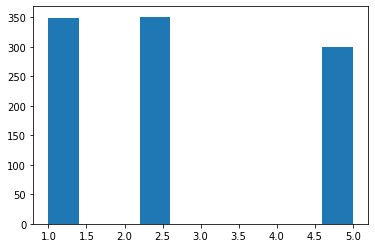

In [38]:
# we'll look at the distribution of data in some columns now
plt.hist(final_df['policy_csl'])
# we  can see that for almost all categories of CSL the data is uniformly distributed

In [39]:
import seaborn as sns

c:\Users\30ris\anaconda3\envs\colproj\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='insured_sex', ylabel='Density'>

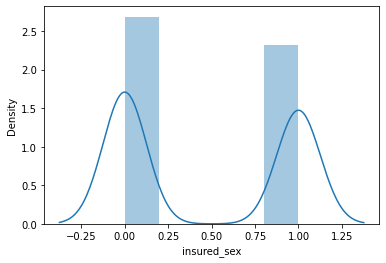

In [40]:
sns.distplot(final_df['insured_sex'])
# we  can see that for almost all categories of the gender of the insured the data is uniformly distributed

c:\Users\30ris\anaconda3\envs\colproj\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='insured_education_level', ylabel='Density'>

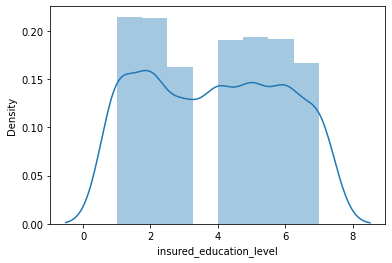

In [41]:
sns.distplot(final_df['insured_education_level'])
# we  can see that for almost all categories of the education level of the person insured the data is uniformly distributed

c:\Users\30ris\anaconda3\envs\colproj\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


'\nWe can see that there are least claims for trivial incidents,\nmost claims for minor incidents,\nand for major and Total loss incidents the claims are almost equal.\n'

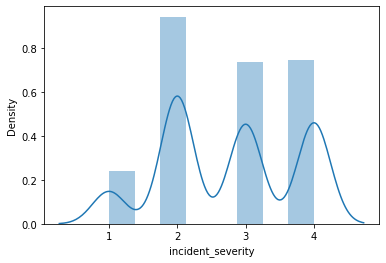

In [42]:
sns.distplot(final_df['incident_severity'])
"""
We can see that there are least claims for trivial incidents,
most claims for minor incidents,
and for major and Total loss incidents the claims are almost equal.
"""

In [43]:
num_df.columns

Index(['months_as_customer', 'age', 'policy_deductable', 'umbrella_limit',
       'capital-gains', 'capital-loss', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'bodily_injuries', 'witnesses',
       'total_claim_amount', 'injury_claim', 'property_claim',
       'vehicle_claim'],
      dtype='object')

c:\Users\30ris\anaconda3\envs\colproj\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


'\nfrom the graph it can be concluded that most of the fraud cases are done by the customers new \nto the company and that too comparatively younger ones. \n'

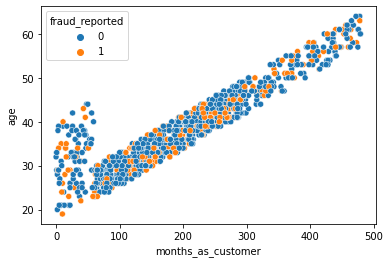

In [44]:
sns.scatterplot(final_df['months_as_customer'],final_df['age'], hue=final_df['fraud_reported'] )
"""
from the graph it can be concluded that most of the fraud cases are done by the customers new 
to the company and that too comparatively younger ones. 
"""

<AxesSubplot:>

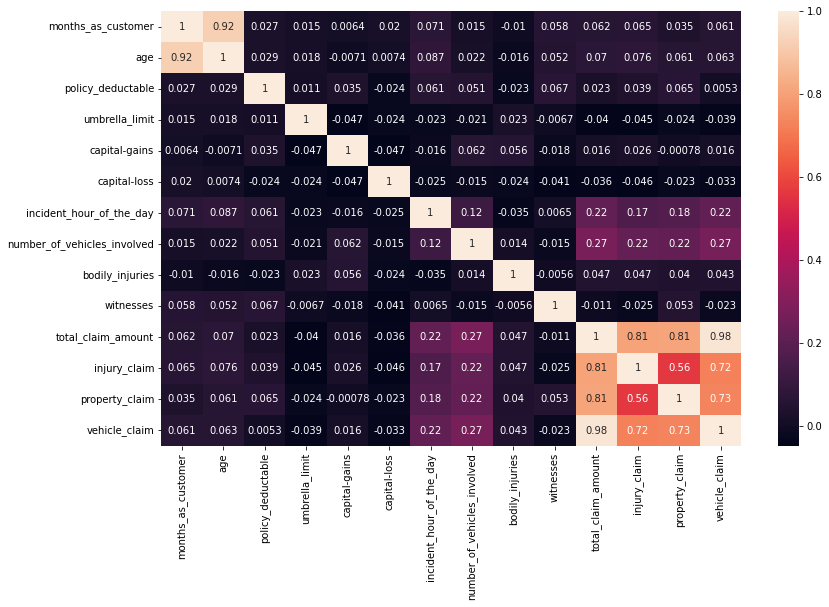

In [45]:
plt.figure(figsize=(13,8))
sns.heatmap(num_df.corr(), annot=True )

From the plot above, we can see that there is high correlation between Age and the number of months. we'll drop the age column.
Also, there is high correlation between total claim amount, injury claim,vehicle claim, and property claim as total claim is the sum of all others. So, we'll drop the total claim column.

In [46]:
x.columns

Index(['months_as_customer', 'age', 'policy_deductable', 'umbrella_limit',
       'capital-gains', 'capital-loss', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'bodily_injuries', 'witnesses',
       'total_claim_amount', 'injury_claim', 'property_claim', 'vehicle_claim',
       'policy_csl', 'insured_sex', 'insured_education_level',
       'incident_severity', 'property_damage', 'police_report_available',
       'insured_occupation_armed-forces', 'insured_occupation_craft-repair',
       'insured_occupation_exec-managerial',
       'insured_occupation_farming-fishing',
       'insured_occupation_handlers-cleaners',
       'insured_occupation_machine-op-inspct',
       'insured_occupation_other-service',
       'insured_occupation_priv-house-serv',
       'insured_occupation_prof-specialty',
       'insured_occupation_protective-serv', 'insured_occupation_sales',
       'insured_occupation_tech-support',
       'insured_occupation_transport-moving',
       'insured_

In [47]:
x.drop(columns=['age','total_claim_amount'], inplace=True)

In [48]:
x.head()

,months_as_customer,policy_deductable,umbrella_limit,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,injury_claim,...,insured_relationship_wife,incident_type_Parked Car,incident_type_Single Vehicle Collision,incident_type_Vehicle Theft,collision_type_Rear Collision,collision_type_Side Collision,authorities_contacted_Fire,authorities_contacted_None,authorities_contacted_Other,authorities_contacted_Police
0,328,1000,0,53300,0,5,1,1,2,6510,...,0,0,1,0,0,1,0,0,0,1
1,228,2000,5000000,0,0,8,1,0,0,780,...,0,0,0,1,1,0,0,0,0,1
2,134,2000,5000000,35100,0,7,3,2,3,7700,...,0,0,0,0,1,0,0,0,0,1
3,256,2000,6000000,48900,-62400,5,1,1,2,6340,...,0,0,1,0,0,0,0,0,0,1
4,228,1000,6000000,66000,-46000,20,1,0,1,1300,...,0,0,0,1,1,0,0,1,0,0


In [49]:
x.describe()

,months_as_customer,policy_deductable,umbrella_limit,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,injury_claim,...,insured_relationship_wife,incident_type_Parked Car,incident_type_Single Vehicle Collision,incident_type_Vehicle Theft,collision_type_Rear Collision,collision_type_Side Collision,authorities_contacted_Fire,authorities_contacted_None,authorities_contacted_Other,authorities_contacted_Police
count,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.00000
mean,203.954000,1136.000000,1.101000e+06,25126.100000,-26793.700000,11.644000,1.83900,0.992000,1.487000,7433.420000,...,0.155000,0.084000,0.403000,0.094000,0.470000,0.27600,0.223000,0.091000,0.198000,0.29200
std,115.113174,611.864673,2.297407e+06,27872.187708,28104.096686,6.951373,1.01888,0.820127,1.111335,4880.951853,...,0.362086,0.277527,0.490746,0.291975,0.499349,0.44724,0.416467,0.287753,0.398692,0.45491
min,0.000000,500.000000,-1.000000e+06,0.000000,-111100.000000,0.000000,1.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000
25%,115.750000,500.000000,0.000000e+00,0.000000,-51500.000000,6.000000,1.00000,0.000000,1.000000,4295.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000
50%,199.500000,1000.000000,0.000000e+00,0.000000,-23250.000000,12.000000,1.00000,1.000000,1.000000,6775.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000
75%,276.250000,2000.000000,0.000000e+00,51025.000000,0.000000,17.000000,3.00000,2.000000,2.000000,11305.000000,...,0.000000,0.000000,1.000000,0.000000,1.000000,1.00000,0.000000,0.000000,0.000000,1.00000
max,479.000000,2000.000000,1.000000e+07,100500.000000,0.000000,23.000000,4.00000,2.000000,3.000000,21450.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.00000


In [50]:
print(x['vehicle_claim'].min())
print(x['vehicle_claim'].max())

70
79560


In [51]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 45 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   months_as_customer                      1000 non-null   int64  
 1   policy_deductable                       1000 non-null   int64  
 2   umbrella_limit                          1000 non-null   int64  
 3   capital-gains                           1000 non-null   int64  
 4   capital-loss                            1000 non-null   int64  
 5   incident_hour_of_the_day                1000 non-null   int64  
 6   number_of_vehicles_involved             1000 non-null   int64  
 7   bodily_injuries                         1000 non-null   int64  
 8   witnesses                               1000 non-null   int64  
 9   injury_claim                            1000 non-null   int64  
 10  property_claim                          1000 non-null   int64

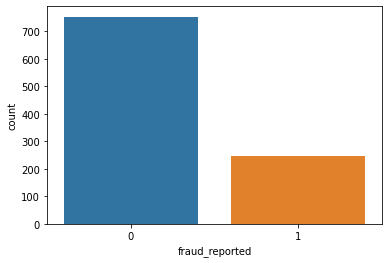

In [52]:
sns.countplot(x="fraud_reported", data=final_df);

### Here we found that our ouput feature is not balanced so we are perforing undersampling and upsampling to make our output feature balanced


### UnderSampling

In [53]:
from imblearn.under_sampling import NearMiss

In [54]:
nm = NearMiss()

In [55]:
X_res,y_res=nm.fit_resample(x,y)

In [56]:
X_res.shape

(494, 45)

In [57]:
from collections import Counter
print('Original dataset shape {}'.format(Counter(y)))
print('Resampled dataset shape {}'.format(Counter(y_res)))

Original dataset shape Counter({0: 753, 1: 247})
Resampled dataset shape Counter({0: 247, 1: 247})


### Applying Logistic Regression on Undersampling

In [58]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_curve, roc_auc_score

In [59]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X_res,y_res,train_size=0.7)


In [60]:
X_res

,months_as_customer,policy_deductable,umbrella_limit,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,injury_claim,...,insured_relationship_wife,incident_type_Parked Car,incident_type_Single Vehicle Collision,incident_type_Vehicle Theft,collision_type_Rear Collision,collision_type_Side Collision,authorities_contacted_Fire,authorities_contacted_None,authorities_contacted_Other,authorities_contacted_Police
0,108,2000,0,0,0,14,1,0,2,6370,...,0,0,1,0,1,0,1,0,0,0
1,75,1000,0,0,0,23,2,2,3,6510,...,0,0,0,0,0,1,0,0,1,0
2,145,1000,0,0,0,18,1,2,0,9500,...,0,0,1,0,0,1,0,0,0,0
3,276,1000,0,0,0,23,3,0,0,5980,...,0,0,0,0,1,0,0,0,0,1
4,45,1000,0,0,0,1,1,0,1,10440,...,1,0,1,0,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
489,234,500,0,59400,-78600,3,3,2,1,15120,...,1,0,0,0,0,1,0,0,0,1
490,266,500,4000000,0,-49600,18,3,1,1,4440,...,0,0,0,0,0,1,0,0,0,0
491,230,2000,0,28900,0,0,3,0,3,5190,...,0,0,0,0,0,0,0,0,0,1
492,232,500,0,0,-58400,11,1,2,3,15400,...,0,0,1,0,1,0,0,0,1,0


In [61]:
X_train.shape

(345, 45)

In [62]:
log_reg = LogisticRegression(solver='lbfgs',max_iter=1000)
log_reg.fit(X_train,y_train)

LogisticRegression(max_iter=1000)

In [63]:
lrtr_pred=log_reg.predict(X_train)
print("Training Accuracy of Logistic Regression on Undersampling")
print(confusion_matrix(y_train,lrtr_pred))
print(accuracy_score(y_train,lrtr_pred))
print(classification_report(y_train,lrtr_pred))

Training Accuracy of Logistic Regression on Undersampling
[[130  45]
 [ 72  98]]
0.6608695652173913
              precision    recall  f1-score   support

           0       0.64      0.74      0.69       175
           1       0.69      0.58      0.63       170

    accuracy                           0.66       345
   macro avg       0.66      0.66      0.66       345
weighted avg       0.66      0.66      0.66       345



In [64]:
lrts_pred=log_reg.predict(X_test)
print("Testing Accuracy of Logistic Regression on Undersampling")
print(confusion_matrix(y_test,lrts_pred))
print(accuracy_score(y_test,lrts_pred))
print(classification_report(y_test,lrts_pred))

Testing Accuracy of Logistic Regression on Undersampling
[[53 19]
 [34 43]]
0.6442953020134228
              precision    recall  f1-score   support

           0       0.61      0.74      0.67        72
           1       0.69      0.56      0.62        77

    accuracy                           0.64       149
   macro avg       0.65      0.65      0.64       149
weighted avg       0.65      0.64      0.64       149



### Applying Decision Tree on Undersampling

In [65]:
from sklearn.tree import DecisionTreeClassifier

In [66]:
dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

In [67]:
dttr_pred=dtree.predict(X_train)
print("Training Accuracy of Decision Tree on Undersampling")
print(confusion_matrix(y_train,dttr_pred))
print(accuracy_score(y_train,dttr_pred))
print(classification_report(y_train,dttr_pred))

Training Accuracy of Decision Tree on Undersampling
[[175   0]
 [  0 170]]
1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       175
           1       1.00      1.00      1.00       170

    accuracy                           1.00       345
   macro avg       1.00      1.00      1.00       345
weighted avg       1.00      1.00      1.00       345



In [68]:
dtts_pred=dtree.predict(X_test)
print("Testing Accuracy of Decision Tree on Undersampling")
print(confusion_matrix(y_test,dtts_pred))
print(accuracy_score(y_test,dtts_pred))
print(classification_report(y_test,dtts_pred))

Testing Accuracy of Decision Tree on Undersampling
[[53 19]
 [19 58]]
0.7449664429530202
              precision    recall  f1-score   support

           0       0.74      0.74      0.74        72
           1       0.75      0.75      0.75        77

    accuracy                           0.74       149
   macro avg       0.74      0.74      0.74       149
weighted avg       0.74      0.74      0.74       149



### Applying Random Forest on Undersampling

In [69]:
class_weight=dict({0:1,1:100})
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(class_weight=class_weight)
rf.fit(X_train,y_train)

RandomForestClassifier(class_weight={0: 1, 1: 100})

In [70]:
rftr_pred=rf.predict(X_train)
print("Training Accuracy of Random Forest on Undersampling")
print(confusion_matrix(y_train,rftr_pred))
print(accuracy_score(y_train,rftr_pred))
print(classification_report(y_train,rftr_pred))

Training Accuracy of Random Forest on Undersampling
[[175   0]
 [  0 170]]
1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       175
           1       1.00      1.00      1.00       170

    accuracy                           1.00       345
   macro avg       1.00      1.00      1.00       345
weighted avg       1.00      1.00      1.00       345



In [71]:
rfts_pred=rf.predict(X_test)
print("Testing Accuracy of Random Forest on Undersampling")
print(confusion_matrix(y_test,rfts_pred))
print(accuracy_score(y_test,rfts_pred))
print(classification_report(y_test,rfts_pred))

Testing Accuracy of Random Forest on Undersampling
[[68  4]
 [40 37]]
0.7046979865771812
              precision    recall  f1-score   support

           0       0.63      0.94      0.76        72
           1       0.90      0.48      0.63        77

    accuracy                           0.70       149
   macro avg       0.77      0.71      0.69       149
weighted avg       0.77      0.70      0.69       149



### ROC & AUC Curve on undersampling of all models of testing prediction

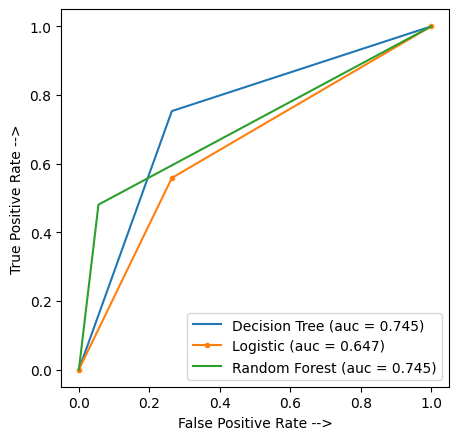

In [72]:
from sklearn.metrics import roc_curve, auc

logistic_fpr, logistic_tpr, threshold = roc_curve(y_test, lrts_pred)
auc_logistic = auc(logistic_fpr, logistic_tpr)

dt_fpr, dt_tpr, threshold = roc_curve(y_test, dtts_pred)
auc_dt = auc(dt_fpr, dt_tpr)

rf_fpr, rf_tpr, threshold = roc_curve(y_test, rfts_pred)
auc_rf = auc(rf_fpr, rf_tpr)

plt.figure(figsize=(5, 5), dpi=100)
plt.plot(dt_fpr, dt_tpr, linestyle='-', label='Decision Tree (auc = %0.3f)' % auc_dt)
plt.plot(logistic_fpr, logistic_tpr, marker='.', label='Logistic (auc = %0.3f)' % auc_logistic)
plt.plot(rf_fpr, rf_tpr, linestyle='-', label='Random Forest (auc = %0.3f)' % auc_dt)

plt.xlabel('False Positive Rate -->')
plt.ylabel('True Positive Rate -->')

plt.legend()

plt.show()

### We have applied logistic regression,decision tree and random forest on undersampled dataset and we have found that decision tree and random forest has given very good accuracy

### UpSampling

In [73]:
from imblearn.combine import SMOTETomek

In [74]:
smk = SMOTETomek(random_state=42)
Xu_res,yu_res=smk.fit_resample(x,y)

In [75]:
from collections import Counter
print('Original dataset shape {}'.format(Counter(y)))
print('Resampled dataset shape {}'.format(Counter(yu_res)))

Original dataset shape Counter({0: 753, 1: 247})
Resampled dataset shape Counter({1: 703, 0: 703})


### Applying Logistic Regression on Upsampling

In [76]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_curve, roc_auc_score

In [77]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(Xu_res,yu_res,train_size=0.7)


In [78]:
log_reg = LogisticRegression(solver='lbfgs',max_iter=1000)
log_reg.fit(X_train,y_train)

LogisticRegression(max_iter=1000)

In [79]:
lrtr_pred=log_reg.predict(X_train)
print("Training Accuracy of Logistic Regression on Upsampling")
print(confusion_matrix(y_train,lrtr_pred))
print(accuracy_score(y_train,lrtr_pred))
print(classification_report(y_train,lrtr_pred))

Training Accuracy of Logistic Regression on Upsampling
[[246 252]
 [160 326]]
0.5813008130081301
              precision    recall  f1-score   support

           0       0.61      0.49      0.54       498
           1       0.56      0.67      0.61       486

    accuracy                           0.58       984
   macro avg       0.58      0.58      0.58       984
weighted avg       0.59      0.58      0.58       984



In [80]:
lrts_pred=log_reg.predict(X_test)
print("Testing Accuracy of Logistic Regression on Upsampling")
print(confusion_matrix(y_test,lrts_pred))
print(accuracy_score(y_test,lrts_pred))
print(classification_report(y_test,lrts_pred))

Testing Accuracy of Logistic Regression on Upsampling
[[ 98 107]
 [ 72 145]]
0.5758293838862559
              precision    recall  f1-score   support

           0       0.58      0.48      0.52       205
           1       0.58      0.67      0.62       217

    accuracy                           0.58       422
   macro avg       0.58      0.57      0.57       422
weighted avg       0.58      0.58      0.57       422



### Applying Decision Tree on Upsampling

In [81]:
from sklearn.tree import DecisionTreeClassifier

In [82]:
dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

In [83]:
dttr_pred=dtree.predict(X_train)
print("Training Accuracy of Decision Tree on Upsampling")
print(confusion_matrix(y_train,dttr_pred))
print(accuracy_score(y_train,dttr_pred))
print(classification_report(y_train,dttr_pred))

Training Accuracy of Decision Tree on Upsampling
[[498   0]
 [  0 486]]
1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       498
           1       1.00      1.00      1.00       486

    accuracy                           1.00       984
   macro avg       1.00      1.00      1.00       984
weighted avg       1.00      1.00      1.00       984



In [84]:
dtts_pred=dtree.predict(X_test)
print("Testing Accuracy of Decision Tree on Upsampling")
print(confusion_matrix(y_test,dtts_pred))
print(accuracy_score(y_test,dtts_pred))
print(classification_report(y_test,dtts_pred))

Testing Accuracy of Decision Tree on Upsampling
[[163  42]
 [ 45 172]]
0.7938388625592417
              precision    recall  f1-score   support

           0       0.78      0.80      0.79       205
           1       0.80      0.79      0.80       217

    accuracy                           0.79       422
   macro avg       0.79      0.79      0.79       422
weighted avg       0.79      0.79      0.79       422



### Applying Random Forest on Upsampling

In [85]:
class_weight=dict({0:1,1:100})
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(class_weight=class_weight)
rf.fit(X_train,y_train)

RandomForestClassifier(class_weight={0: 1, 1: 100})

In [86]:
rftr_pred=rf.predict(X_train)
print("Training Accuracy of Random Forest on Upsampling")
print(confusion_matrix(y_train,rftr_pred))
print(accuracy_score(y_train,rftr_pred))
print(classification_report(y_train,rftr_pred))

Training Accuracy of Random Forest on Upsampling
[[498   0]
 [  0 486]]
1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       498
           1       1.00      1.00      1.00       486

    accuracy                           1.00       984
   macro avg       1.00      1.00      1.00       984
weighted avg       1.00      1.00      1.00       984



In [87]:
rfts_pred=rf.predict(X_test)
print("Testing Accuracy of Random Forest on Upsampling")
print(confusion_matrix(y_test,rfts_pred))
print(accuracy_score(y_test,rfts_pred))
print(classification_report(y_test,rfts_pred))

Testing Accuracy of Random Forest on Upsampling
[[190  15]
 [ 51 166]]
0.8436018957345972
              precision    recall  f1-score   support

           0       0.79      0.93      0.85       205
           1       0.92      0.76      0.83       217

    accuracy                           0.84       422
   macro avg       0.85      0.85      0.84       422
weighted avg       0.85      0.84      0.84       422



### ROC & AUC Curve on upsampling of all models of testing prediction

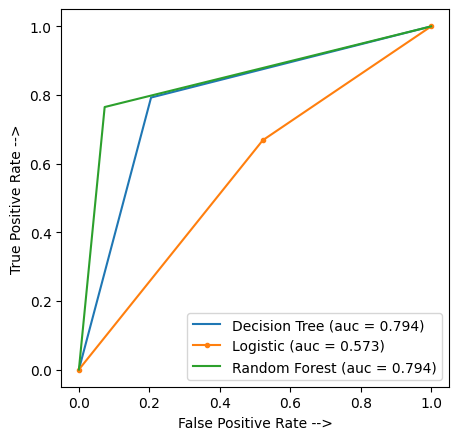

In [88]:
from sklearn.metrics import roc_curve, auc

logistic_fpr, logistic_tpr, threshold = roc_curve(y_test, lrts_pred)
auc_logistic = auc(logistic_fpr, logistic_tpr)

dt_fpr, dt_tpr, threshold = roc_curve(y_test, dtts_pred)
auc_dt = auc(dt_fpr, dt_tpr)

rf_fpr, rf_tpr, threshold = roc_curve(y_test, rfts_pred)
auc_rf = auc(rf_fpr, rf_tpr)

plt.figure(figsize=(5, 5), dpi=100)
plt.plot(dt_fpr, dt_tpr, linestyle='-', label='Decision Tree (auc = %0.3f)' % auc_dt)
plt.plot(logistic_fpr, logistic_tpr, marker='.', label='Logistic (auc = %0.3f)' % auc_logistic)
plt.plot(rf_fpr, rf_tpr, linestyle='-', label='Random Forest (auc = %0.3f)' % auc_dt)

plt.xlabel('False Positive Rate -->')
plt.ylabel('True Positive Rate -->')

plt.legend()

plt.show()

In [89]:
x.head(5)

,months_as_customer,policy_deductable,umbrella_limit,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,injury_claim,...,insured_relationship_wife,incident_type_Parked Car,incident_type_Single Vehicle Collision,incident_type_Vehicle Theft,collision_type_Rear Collision,collision_type_Side Collision,authorities_contacted_Fire,authorities_contacted_None,authorities_contacted_Other,authorities_contacted_Police
0,328,1000,0,53300,0,5,1,1,2,6510,...,0,0,1,0,0,1,0,0,0,1
1,228,2000,5000000,0,0,8,1,0,0,780,...,0,0,0,1,1,0,0,0,0,1
2,134,2000,5000000,35100,0,7,3,2,3,7700,...,0,0,0,0,1,0,0,0,0,1
3,256,2000,6000000,48900,-62400,5,1,1,2,6340,...,0,0,1,0,0,0,0,0,0,1
4,228,1000,6000000,66000,-46000,20,1,0,1,1300,...,0,0,0,1,1,0,0,1,0,0


In [90]:
x.columns

Index(['months_as_customer', 'policy_deductable', 'umbrella_limit',
       'capital-gains', 'capital-loss', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'bodily_injuries', 'witnesses',
       'injury_claim', 'property_claim', 'vehicle_claim', 'policy_csl',
       'insured_sex', 'insured_education_level', 'incident_severity',
       'property_damage', 'police_report_available',
       'insured_occupation_armed-forces', 'insured_occupation_craft-repair',
       'insured_occupation_exec-managerial',
       'insured_occupation_farming-fishing',
       'insured_occupation_handlers-cleaners',
       'insured_occupation_machine-op-inspct',
       'insured_occupation_other-service',
       'insured_occupation_priv-house-serv',
       'insured_occupation_prof-specialty',
       'insured_occupation_protective-serv', 'insured_occupation_sales',
       'insured_occupation_tech-support',
       'insured_occupation_transport-moving',
       'insured_relationship_not-in-family',


In [91]:
y.head(5)

0    1
1    1
2    0
3    1
4    0
Name: fraud_reported, dtype: int64

In [92]:
v=[328,1000,0,53300,0,5,1,1,2,6510,13020,52080,
2.5,1,6,3,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1]

In [93]:
v=np.array(v)

In [94]:
rf.predict(X_res.head(1))

array([0], dtype=int64)

In [95]:
x.shape

(1000, 45)

In [96]:
rf.predict([[108,2000,0,0,0,14,1,0,2,6370,6370,44590,5.0,1,4,4,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,1,0,0,0]])

array([0], dtype=int64)

In [97]:
X_res.head(1).to_csv('x.csv')

In [98]:
import pickle

In [99]:
filename2 = 'rf_model.pkl'
pickle.dump(rf, open(filename2, 'wb'))

In [100]:
loaded_model = pickle.load(open(filename2, 'rb'))
a=loaded_model.predict(x.head(1))
a

array([1], dtype=int64)

In [105]:
pd.set_option('display.max_columns', None)

In [108]:
x.head(1).transpose()

,0
months_as_customer,328.0
policy_deductable,1000.0
umbrella_limit,0.0
capital-gains,53300.0
capital-loss,0.0
incident_hour_of_the_day,5.0
number_of_vehicles_involved,1.0
bodily_injuries,1.0
witnesses,2.0
injury_claim,6510.0


In [100]:
loaded_model.predict([[328,1000,0,53300,0,5,1,1,2,6510,13020,52080,
2.5,1,6,3,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1]])

array([1], dtype=int64)

In [103]:
x.head(1).to_csv('x.csv')

In [97]:
# splitting the data for model training

# splitting the data into training and test set
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y=train_test_split(x,y, random_state=355 )

In [98]:
train_x.head()

,months_as_customer,policy_deductable,umbrella_limit,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,injury_claim,...,insured_relationship_wife,incident_type_Parked Car,incident_type_Single Vehicle Collision,incident_type_Vehicle Theft,collision_type_Rear Collision,collision_type_Side Collision,authorities_contacted_Fire,authorities_contacted_None,authorities_contacted_Other,authorities_contacted_Police
65,254,500,0,35700,0,6,3,2,2,13720,...,0,0,0,0,0,0,0,0,0,0
244,95,1000,0,0,-70300,3,1,1,2,640,...,0,0,0,1,1,0,0,1,0,0
595,56,500,0,0,-28800,13,1,1,2,0,...,0,0,1,0,1,0,0,0,0,1
873,322,2000,0,0,-46000,18,1,0,2,7680,...,0,0,1,0,1,0,0,0,0,0
631,147,1000,6000000,0,-48400,2,2,1,2,9760,...,0,0,0,0,1,0,0,0,1,0


In [99]:
num_df=train_x[['months_as_customer', 'policy_deductable', 'umbrella_limit',
       'capital-gains', 'capital-loss', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'bodily_injuries', 'witnesses', 'injury_claim', 'property_claim',
       'vehicle_claim']]

In [100]:
num_df.columns

Index(['months_as_customer', 'policy_deductable', 'umbrella_limit',
       'capital-gains', 'capital-loss', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'bodily_injuries', 'witnesses',
       'injury_claim', 'property_claim', 'vehicle_claim'],
      dtype='object')

In [101]:
print(train_x.shape)
print(num_df.shape)

(750, 45)
(750, 12)


In [102]:
# Scaling the numeric values in the dataset

from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [103]:
scaled_data=scaler.fit_transform(num_df)
scaled_num_df= pd.DataFrame(data=scaled_data, columns=num_df.columns,index=train_x.index)
scaled_num_df.shape

(750, 12)

In [104]:
num_df.head()

,months_as_customer,policy_deductable,umbrella_limit,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,injury_claim,property_claim,vehicle_claim
65,254,500,0,35700,0,6,3,2,2,13720,6860,61740
244,95,1000,0,0,-70300,3,1,1,2,640,320,2240
595,56,500,0,0,-28800,13,1,1,2,0,6500,52000
873,322,2000,0,0,-46000,18,1,0,2,7680,7680,26880
631,147,1000,6000000,0,-48400,2,2,1,2,9760,4880,39040


In [105]:
scaled_num_df.head()

,months_as_customer,policy_deductable,umbrella_limit,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,injury_claim,property_claim,vehicle_claim
65,0.435244,-1.037803,-0.468878,0.385876,0.975789,-0.819548,1.162385,1.271286,0.43186,1.285251,-0.128241,1.270329
244,-0.930728,-0.209769,-0.468878,-0.904442,-1.546393,-1.248282,-0.812221,0.034626,0.43186,-1.393623,-1.490999,-1.909700
595,-1.265778,-1.037803,-0.468878,-0.904442,-0.057480,0.180830,-0.812221,0.034626,0.43186,-1.524700,-0.203255,0.749767
873,1.019433,1.446300,-0.468878,-0.904442,-0.674572,0.895386,-0.812221,-1.202033,0.43186,0.048217,0.042625,-0.592794
631,-0.483995,-0.209769,2.171861,-0.904442,-0.760678,-1.391193,0.175082,0.034626,0.43186,0.474215,-0.540819,0.057108


In [106]:
scaled_num_df.isna().sum()

months_as_customer             0
policy_deductable              0
umbrella_limit                 0
capital-gains                  0
capital-loss                   0
incident_hour_of_the_day       0
number_of_vehicles_involved    0
bodily_injuries                0
witnesses                      0
injury_claim                   0
property_claim                 0
vehicle_claim                  0
dtype: int64

In [107]:
train_x.drop(columns=scaled_num_df.columns, inplace=True)

In [108]:
train_x.shape

(750, 33)

In [109]:
train_x.head()

,policy_csl,insured_sex,insured_education_level,incident_severity,property_damage,police_report_available,insured_occupation_armed-forces,insured_occupation_craft-repair,insured_occupation_exec-managerial,insured_occupation_farming-fishing,...,insured_relationship_wife,incident_type_Parked Car,incident_type_Single Vehicle Collision,incident_type_Vehicle Theft,collision_type_Rear Collision,collision_type_Side Collision,authorities_contacted_Fire,authorities_contacted_None,authorities_contacted_Other,authorities_contacted_Police
65,1.0,0,6,2,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
244,2.5,1,5,1,1,0,1,0,0,0,...,0,0,0,1,1,0,0,1,0,0
595,1.0,1,1,3,1,1,0,0,0,1,...,0,0,1,0,1,0,0,0,0,1
873,2.5,0,7,3,0,1,1,0,0,0,...,0,0,1,0,1,0,0,0,0,0
631,5.0,0,5,4,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0


In [110]:
train_x=pd.concat([scaled_num_df,train_x],axis=1)

In [111]:
train_x.head()

,months_as_customer,policy_deductable,umbrella_limit,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,injury_claim,...,insured_relationship_wife,incident_type_Parked Car,incident_type_Single Vehicle Collision,incident_type_Vehicle Theft,collision_type_Rear Collision,collision_type_Side Collision,authorities_contacted_Fire,authorities_contacted_None,authorities_contacted_Other,authorities_contacted_Police
65,0.435244,-1.037803,-0.468878,0.385876,0.975789,-0.819548,1.162385,1.271286,0.43186,1.285251,...,0,0,0,0,0,0,0,0,0,0
244,-0.930728,-0.209769,-0.468878,-0.904442,-1.546393,-1.248282,-0.812221,0.034626,0.43186,-1.393623,...,0,0,0,1,1,0,0,1,0,0
595,-1.265778,-1.037803,-0.468878,-0.904442,-0.057480,0.180830,-0.812221,0.034626,0.43186,-1.524700,...,0,0,1,0,1,0,0,0,0,1
873,1.019433,1.446300,-0.468878,-0.904442,-0.674572,0.895386,-0.812221,-1.202033,0.43186,0.048217,...,0,0,1,0,1,0,0,0,0,0
631,-0.483995,-0.209769,2.171861,-0.904442,-0.760678,-1.391193,0.175082,0.034626,0.43186,0.474215,...,0,0,0,0,1,0,0,0,1,0


In [112]:
train_x.shape

(750, 45)

In [113]:
test_x.head()

,months_as_customer,policy_deductable,umbrella_limit,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,injury_claim,...,insured_relationship_wife,incident_type_Parked Car,incident_type_Single Vehicle Collision,incident_type_Vehicle Theft,collision_type_Rear Collision,collision_type_Side Collision,authorities_contacted_Fire,authorities_contacted_None,authorities_contacted_Other,authorities_contacted_Police
381,47,500,0,64800,-24300,23,1,1,3,11440,...,0,0,1,0,0,0,0,0,0,1
732,96,2000,0,10000,0,9,1,2,3,7120,...,0,0,1,0,0,0,0,0,0,0
179,235,500,4000000,0,-31700,1,1,2,1,450,...,1,0,0,1,1,0,0,1,0,0
845,147,2000,0,0,0,11,3,0,1,6240,...,0,0,0,0,0,1,0,0,0,0
111,453,500,6000000,52600,-38800,0,1,0,0,14000,...,0,0,1,0,0,0,1,0,0,0
